## 1. 원-핫 인코딩(One-hot encoding)이란?
---
원-핫 인코딩은 선택해야 하는 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소는 0의 값을 가지도록 하는 표현 방법이다. 예를 들어 강아지, 고양이, 냉장고라는 3개의 선택지가 있다고 해본다. <br><br>
원-핫 인코딩을 하기 위해서는 우선 각 선택지에 순차적으로 정수 인덱스를 부여한다. 임의로 강아지는 0번 인덱스, 고양이는 1번 인덱스, 냉장고는 2번 인덱스를 부여했다. 이때 각 선택지에 대해서 원-핫 인코딩이 된 벡터는 다음과 같다.<br><br>

강아지 = [1, 0, 0] <br>
고양이 = [0, 1, 0]<br>
냉장고 = [0, 0, 1]<br><br>
총 선택지는 3개였으므로 위 벡터는 전부 3차원 벡터가 되었다. 그리고 각 선택지의 벡터들을 보면 선택지의 인덱스에만 1의 값을 가지고, 나머지 원소들은 0의 값을 가진다. 예를 들어 고양이는 1번 인덱스였으므로 원-핫 인코딩으로 얻은 벡터에서 1번 인덱스만 1의 값을 가지는 것을 볼 수 있다. <br><br>
이와 같이 원-핫 인코딩으로 표현된 벡터를 **원-핫 벡터(one-hot vector)**라고 한다.

## 2. 원-핫 벡터의 무작위성
---
꼭 실제값을 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만, 대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 표현 방법이다.<br><br>
다수의 클래스를 분류하는 문제에서는 이진 분류처럼 2개의 숫자 레이블이 아니라 클래스의 개수만큼 숫자 레이블이 필요하다. 이때 직관적으로 생각해볼 수 있는 레이블링 방법은 분류해야 할 클래스 전체에 정수 인코딩을 하는거다. 예를 들어서 분류해야 할 레이블이 {red, green, blue}와 같이 3개라면 각각 0, 1, 2로 레이블을 한다. 그런데 일반적인 다중 클래스 분류 문제에서 레이블링 방법으로는 위와 같은 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 보다 클래스의 성질을 잘 표현했다고 할 수 있다. 그 이유를 알아보자. <br><br>
Banana, Tomato, Apple이라는 3개의 클래스가 존재하는 문제가 있다고 하자. 레이블은 정시 인코딩을 사용하여 각각 1, 2, 3을 부여했다. 손실 함수로 선형 회귀 챕터에서 배운 평균 제곱 오차 MSE를 사용하면 정수 인코딩이 어떤 오해를 불러일으킬 수 있는지 확인할 수 있다. 아래의 식은 앞서 선형 회귀에서 배웠던 MSE를 다시 그대로 가져온 것이다. y^는 예측값을 의미한다.
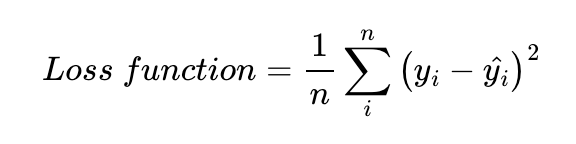
직관적인 오차 크기 비교를 위해 평균을 구하는 수식은 제외하고 제곱오차로만 판단해본다.<br>
실제값이 Tomato일 때 예측값이 Banana이었다면 제곱 오차는 다음과 같다.<br>
(2 - 1)^2 = 1<br>
실제값이 Apple일 때 예측값이 Banana였다면 제곱 오차는 다음과 같다.<br>
(3 - 1)^2 = 4<br><br>
즉, Banan과 Tomato사이의 오차보다 Banana와 Apple의 오차가 더 크다. 이는 기계에게 Banana가 Apple보다는 Tomato에 더 가깝다는 정보를 주는 것과 다름없다. 더 많은 클래스에 대해서 정수 인코딩을 수행했다고 해본다.<br><br>
{Banana :1, Tomato :2, Apple :3, Strawberry :4, ... Watermelon :10}
이 정수 인코딩은 Banana가 Watermelon보다는 Tomato에 더 가깝다는 의미를 담고있다. 이는 사용자가 부여하고자 했던 정보가 아니다. 이러한 정수 인코딩의 순서 정보가 도움이 되는 분류 문제도 물론 있다. 바로 각 클래스가 순서의 의미를 갖고 있어서 회귀를 통해서 분류 문제를 풀 수 있는 경우다. 예를 들어 {baby, child, adolescent, adult}나 {1층, 2층, 3층, 4층}이나 {10대, 20대, 30대, 40대}와 같은 경우가 이에 해당된다. 하지만 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고 있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳다. 정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배한다.<br><br>
아래는 세 개의 카테고리에 대해서 원-핫 인코딩을 통해서 레이블을 인코딩헀을 때 각 클래스 간의 제곱 오차가 균등함을 보여준다.
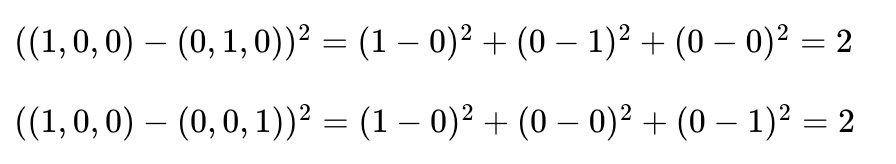
다르게 표현하면 모든 클래스에 대해서 원-핫 인코딩을 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일하다. 원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있다. 뒤에서 다시 언급되겠지만 이러한 원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 한다.